In [19]:
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import json
import itertools
from collections import Counter
%matplotlib inline
sns.set()

In [1]:
import pandas as pd
import tweepy as tw

consumer_key = "oS4qitRipHwUzsjANd2CiFMX5"
consumer_secret ="HBgzw1T0lRA3b64tw2T99aQi6ASQfe2tRWfpTG2zNzMzymhADc"
access_token = "764059813198299136-SzoWF9uPtZePB0fCNWnKnomxgmhVTGC"
access_token_secret ="a1XEyPRBO64h4gC25f9nFmIau83RuxkssHal9PZ0Be53b"
# # 
# Consumer_key = 'kGaRMeBr1gj4X5i3XTxvP1jIl'
# Consumer_secret = 'Zyg0TJzfCQI89P7cPTSXRuGprjKUyZpbPe6BQ1CDv6g7okc4Bo'
# Access_token = '971157695242805248-JJW6I9V3Fsw3fc56npsHfkFR51uxXvH'
# Access_secret = 'csB5CQnIQWpzwQJmBIeB5Pm4gLxWOTv15uOPdF6xaxlc3'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

# search_words ="earthquake+disaster" # you gonna search by hashtags , the "+" stands for concatenating keywords
search_words ="311 -filter:retweets" # you gonna search by hashtags , the "+" stands for concatenating keywords
date = "2021-03-10" # choose any date with the format "yyyy-mm-dd"
untildate = "2021-03-12" # choose any date with the format "yyyy-mm-dd"
number_posts = 10000 # choose the number of posts available in that day 



posts =[]

tweets = tw.Cursor(api.search,
q=search_words,
lang="en",since=date
,
until=untildate
).items(number_posts)


for tweet in tweets:
    # posts.append([tweet.user.screen_name,tweet.user.location,tweet.text])
    posts.append([tweet.text])


df = pd.DataFrame(posts)
# df.to_csv('data.txt',index=False,header=["username","location","text"])
df.to_csv(date+'_en_311.txt',index=False,header=["text"])

TweepError: Twitter error response: status code = 429

In [6]:
filename = date+"_en.txt"
with open(filename, "r", encoding="utf-8") as afile:
            string = afile.read()
            sptext = string.splitlines()

In [7]:
print(sptext)

rs since the Great East Japan Earthquake.', '', 'We are once again reminded of all the support and enco… https://t.co/tvOJyjE0Tf"', 'Dear Japanese friends. Today my heart goes out to you in commemoration of the terrible earthquake your country suff… https://t.co/OKqjvE8vFK', '"I’ve had a vague “is this an earthquake or am I losing my mind?” feeling for a couple of weeks, anytime I was sitti… https://t.co/fGq1y2GzJx"', '"10 Years Since the Great East Japan Earthquake.', '', '“We will never forget 03.11.2011” https://t.co/Z4tEhnWY0v"', '🙏for those affected by the Tohoku earthquake and tsunami', '"1993 6th Children\'s Miracle Network Telethon', '', '1994 6.0 earthquake/avalanche destroys Toez, Colombia (about 1000 kil… https://t.co/4u20AjVHET"', 'Having trouble sleeping through earthquakes? Did you feel the Pacoima quake? Here is a sleep solution!… https://t.co/VMZfTtQcdv', '"@2ndclemCj Be prepared for anything', 'I think it\'s important to prepare by stockpiling supplies, checking evacua

In [8]:
string = '\n'.join(sptext)
print(string)

1 Tohoku earthquake: Foreign Minister Jaushi… https://t.co/Ax2ua8ZI7d
"GF Piping Systems donates 5'000 ELGEF Plus Fittings to quake-stricken Croatia - https://t.co/vHs2ElZ1iv
On 29 Decem… https://t.co/E0j7Ha2Gd0"
Buddhist monks read the sutras at the seaside to commemorate the 10th anniversary of the 2011 earthquake-tsunami in… https://t.co/HpilcDEwZW
"@Dgeergania Hi, I’m Disaster Bot. To report earthquake impacts in your area, reply with #earthquake. https://t.co/dsvKNP9YdT"
"@fiekyu Hi, I’m Disaster Bot. To report earthquake impacts in your area, reply with #earthquake. https://t.co/GOKmuvPP1c"
"10th commemoration of The Great East Japan Earthquake, Tsunami and Fukus... https://t.co/XE2gx3fzyE via @YouTube"
"Today marks 10 years since the Great East Japan Earthquake.

We are once again reminded of all the support and enco… https://t.co/tvOJyjE0Tf"
Dear Japanese friends. Today my heart goes out to you in commemoration of the terrible earthquake your country suff… https://t.co/OKqjvE8v

In [9]:
string = re.sub('　', '', string)
string = re.sub('#', '', string)
print(string)

EaMVK
Foreign Minister Wu lauds Taiwan-Japan friendship on anniversary of 2011 Tohoku earthquake: Foreign Minister Jaushi… https://t.co/Ax2ua8ZI7d
"GF Piping Systems donates 5'000 ELGEF Plus Fittings to quake-stricken Croatia - https://t.co/vHs2ElZ1iv
On 29 Decem… https://t.co/E0j7Ha2Gd0"
Buddhist monks read the sutras at the seaside to commemorate the 10th anniversary of the 2011 earthquake-tsunami in… https://t.co/HpilcDEwZW
"@Dgeergania Hi, I’m Disaster Bot. To report earthquake impacts in your area, reply with earthquake. https://t.co/dsvKNP9YdT"
"@fiekyu Hi, I’m Disaster Bot. To report earthquake impacts in your area, reply with earthquake. https://t.co/GOKmuvPP1c"
"10th commemoration of The Great East Japan Earthquake, Tsunami and Fukus... https://t.co/XE2gx3fzyE via @YouTube"
"Today marks 10 years since the Great East Japan Earthquake.

We are once again reminded of all the support and enco… https://t.co/tvOJyjE0Tf"
Dear Japanese friends. Today my heart goes out to you in commem

In [10]:
string = re.split('。(?!」)|\n', string)
print(string)

sunami and Fukus... https://t.co/XE2gx3fzyE via @YouTube"', '"Today marks 10 years since the Great East Japan Earthquake.', '', 'We are once again reminded of all the support and enco… https://t.co/tvOJyjE0Tf"', 'Dear Japanese friends. Today my heart goes out to you in commemoration of the terrible earthquake your country suff… https://t.co/OKqjvE8vFK', '"I’ve had a vague “is this an earthquake or am I losing my mind?” feeling for a couple of weeks, anytime I was sitti… https://t.co/fGq1y2GzJx"', '"10 Years Since the Great East Japan Earthquake.', '', '“We will never forget 03.11.2011” https://t.co/Z4tEhnWY0v"', '🙏for those affected by the Tohoku earthquake and tsunami', '"1993 6th Children\'s Miracle Network Telethon', '', '1994 6.0 earthquake/avalanche destroys Toez, Colombia (about 1000 kil… https://t.co/4u20AjVHET"', 'Having trouble sleeping through earthquakes? Did you feel the Pacoima quake? Here is a sleep solution!… https://t.co/VMZfTtQcdv', '"@2ndclemCj Be prepared for anythin

In [11]:
newstring = []
for st in string:
    words = re.sub(r'.*http.*', '', st)
    newstring.append(words)

print(newstring)

Update Info Earthquake 4.56 km of River John Airport - United States - 2.00ml/71km - 11/03/2021 09:14:16 UTC (USGS/Update) eqvyt_8236 (1x)', '', '', '"Worldwide FM @worldwidefm 11.03.21 ', '', 'Unity Remembrance of 2011 TOHOKU Earthquake and Tsunami Disaster', '', 'Mari*', '', '', 'THERE WAS AN EARTHQUAKE IN PACOIMA AND I DIDNT EVEN FEEL IT', '', '', "@alestierre i thought there's an earthquake in my heart. n ure the epicenter 😭💜", '', '', '', 'LookUPTVUpdates"', '', '', '', '"Moderate magnitude 4.5 earthquake 46 km southwest of Reykjavik, Iceland - info, user reports and updates', '', '"Just realized also how especially disrespectful everyone is, as today is the anniversary of the 2011 tohoku earthquake and tsunami..."', '', '@MechanicalDClaw Mine is today and it started with a earthquake', '"【Media Info】', 'Web「Metropolis Magazine」', 'Interview published.', '', '', '', '"Earthquake M4.2 New Zealand 3mins ago 11 Mar 09:09 UTC - report/info: ', '', 'New Earthquake 4.13 km of River John

In [12]:
while '' in newstring:
   newstring.remove('') 

print(newstring)

arthquake disaster.', 'It has been 10 years since the earthquake in the Tohoku region', 'Ten years after the Great East Japan Earthquake(Statement by Japan’s Minister for Foreign Affairs MOTEGI Toshimitsu)', 'New Earthquake 77.14 km of Batumerah - Indonesia - 5.73M/198km - 11/03/2021 09:19:14 UTC (BMKG/Automatic) eqvyt_8238 (0x)', 'It has been 10 years since the Great East Japan Earthquake. Today is March 11th.🙏', '@twinkliekoo MAY NARRATIVE KA NA SA HEALTH? UNG EARTHQUAKE DRILL?', '"PRT', '- The book is a collab project between Takeru and Kamiki', 'I was in a earthquake last year... shit was weird last year', '"Earthquake ML. 1.9 21/03/11 08.41', 'Gmt.37.902 15.1718 dpt 21.6km.', 'Near city Motta Camastra.', 'Data from SURVEY-INGV.', '"March 11, 2011: Great East Japan Earthquake', 'Sharjah24"', '"Remembering 3/11 - 10 years on', 'Wa nay mas bugo pas virtual earthquake drill', 'Do you feel earthquake in the United States?', '"Lee takes great photos', 'Via @tokyotimes ', '"The Great Eas

In [13]:
#形態素分解

m = MeCab.Tagger("-Ochasen")

In [14]:
wordlists = [ \
    [v.split()[2] for v in m.parse(sentense).splitlines() \
       if (len(v.split())>=3 and v.split()[3][:2]=='名詞')] \
    for sentense in newstring]

print(wordlists)

TC', '(', 'EMSC', '/', 'Automatic', ')', 'eqvyt', '_', '8232', '(', '0', 'x', ')'], ['"', 'Ten', 'years', 'ago', 'today', ',', 'a', 'massive', 'earthquake', 'in', 'Tohoku', 'triggered', 'the', 'Fukushima', 'nuclear', 'crisis', '.', 'Hard', 'to', 'believe', 'a', 'decade', 'has', 'passed', '."'], ['"', '2', ':', '46', 'pm', ',', 'March', '11', ',', '2011', '.', 'Hard', 'to', 'believe', 'it', 's', 'been', '10', 'years', 'since', 'the', 'Great', 'Tohoku', 'Earthquake', 'and', 'tsunami', '."'], ['earthquake', '?', 'What', 'earthquake', '?'], ['"', 'and', 'to', 'end', 'this', 'shitty', 'day', 'is', 'an', 'earthquake', '+', 'rain', 'combo', ',', 'we', 'luv', 'to', 'see', 'it', '✨"'], ['This', 'detection', 'is', 'linked', 'to', 'the', 'light', 'earthquake', 'which', 'shook', 'Greece', '3', 'min', 'ago'], ['I', 'went', 'on', 'this', 'app', 'to', 'twwet', 'about', 'the', 'larain', '.', 'What', 'freaking', 'earthquake', '?!?!'], ['Ok', 'that', 'was', 'an', 'earthquake', 'I', 'thought', 'I', 'was'

In [15]:
wordlist = list(itertools.chain.from_iterable(wordlists))
print(wordlist)

tes', 'YALL', 'HAVE', 'EARTHQUAKE', 'DRILLS', '?', '"', 'Earthquake', 'M', '4', '.', '1', 'ICELAND', 'REGION', '4', 'mins', 'ago', '11', 'Mar', '08', ':', '53', 'UTC', '-', 'report', '/', 'info', ':', 'New', 'Earthquake', '1', '.', '16', 'km', 'of', 'Tajo', 'Villas', '-', 'Greece', '-', '4', '.', '30', 'ml', '/', '2', 'km', '-', '11', '/', '03', '/', '2021', '08', ':', '56', ':', '40', 'UTC', '(', 'EMSC', '/', 'Automatic', ')', 'eqvyt', '_', '8232', '(', '0', 'x', ')', '"', 'Ten', 'years', 'ago', 'today', ',', 'a', 'massive', 'earthquake', 'in', 'Tohoku', 'triggered', 'the', 'Fukushima', 'nuclear', 'crisis', '.', 'Hard', 'to', 'believe', 'a', 'decade', 'has', 'passed', '."', '"', '2', ':', '46', 'pm', ',', 'March', '11', ',', '2011', '.', 'Hard', 'to', 'believe', 'it', 's', 'been', '10', 'years', 'since', 'the', 'Great', 'Tohoku', 'Earthquake', 'and', 'tsunami', '."', 'earthquake', '?', 'What', 'earthquake', '?', '"', 'and', 'to', 'end', 'this', 'shitty', 'day', 'is', 'an', 'earthquake

In [16]:
cnt = Counter(wordlist)
# sorted(cnt.items(), key=lambda x: x[1],reverse=True)[:10]
sorted(cnt.items(), key=lambda x: x[1],reverse=True)[:1000]


[('.', 270),
 ('earthquake', 214),
 ('"', 204),
 ('the', 150),
 (',', 112),
 (':', 108),
 ('-', 104),
 ('Earthquake', 99),
 ('/', 91),
 ('Japan', 87),
 ('of', 82),
 ('10', 80),
 ('and', 78),
 ('11', 78),
 ('in', 73),
 ('I', 67),
 ('a', 66),
 ('was', 65),
 ('an', 53),
 ('@', 52),
 ('years', 49),
 ('to', 47),
 ('km', 43),
 ('(', 42),
 (')', 42),
 ('3', 40),
 ("'", 39),
 ('that', 36),
 ('4', 36),
 ('on', 35),
 ('is', 35),
 ('2', 35),
 ('s', 35),
 ('?', 35),
 ('it', 34),
 ('UTC', 34),
 ('ago', 34),
 ('New', 33),
 ('09', 31),
 ('Great', 30),
 ('since', 29),
 ('tsunami', 29),
 ('2021', 29),
 ('_', 28),
 ('03', 28),
 ('East', 27),
 ('1', 27),
 ('M', 26),
 ('2011', 26),
 ('"@', 25),
 ('you', 23),
 ('Zealand', 22),
 ('."', 22),
 ('0', 21),
 ('there', 20),
 ('t', 20),
 ('March', 20),
 ('i', 20),
 ('7', 19),
 ('Mar', 19),
 ('Tohoku', 18),
 ('It', 18),
 ('Today', 17),
 ('th', 17),
 ('5', 17),
 ('for', 17),
 ('all', 17),
 ('been', 17),
 ('info', 17),
 ('my', 17),
 ('EARTHQUAKE', 16),
 ('eqvyt', 15)

In [17]:
mojiretu = ' '.join(wordlist)
print(mojiretu)

earthquake hits Greek island of Lefkada an online earthquake drill using google meet ... idk what to say @ DamCou I did the earthquake last summer . So it s volcano for me 10 years after the earthquake disaster . It has been 10 years since the earthquake in the Tohoku region Ten years after the Great East Japan Earthquake ( Statement by Japan s Minister for Foreign Affairs MOTEGI Toshimitsu ) New Earthquake 77 . 14 km of Batumerah - Indonesia - 5 . 73 M / 198 km - 11 / 03 / 2021 09 : 19 : 14 UTC ( BMKG / Automatic ) eqvyt _ 8238 ( 0 x ) It has been 10 years since the Great East Japan Earthquake . Today is March 11 th . @ twinkliekoo MAY NARRATIVE KA NA SA HEALTH ? UNG EARTHQUAKE DRILL ? " PRT - The book is a collab project between Takeru and Kamiki I was in a earthquake last year ... shit was weird last year " Earthquake ML . 1 . 9 21 / 03 / 11 08 . 41 Gmt . 37 . 902 15 . 1718 dpt 21 . 6 km . Near city Motta Camastra . Data from SURVEY - INGV . " March 11 , 2011 : Great East Japan Eart

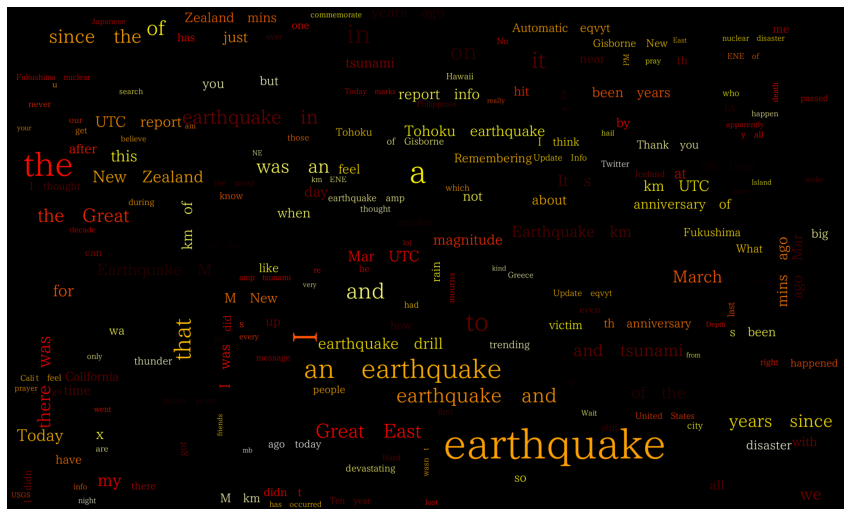

In [21]:
fpath = "Harenosora.otf"
# stop_words = [ u'もの',u'こと',u'安倍',u'今日',u'日本',u'昨日',u'私',u'総理',u'本日',u'さん']
stop_words = [ 
    u'Yahoo'
    ,u'JAPAN'
    ,u'YahooSearchJP'
    ,u'RT'
    ,u'#'
    ,u'@'
    ,u'"'
    ,u':'
    ,u'_'
    ,u','
    ,u'username'
    ,u'livedoornews'
    ,u''
    ,u''
    ,u''
    ]
# wordcloud = WordCloud(background_color="white",colormap="Greys", width=2000, height=1200,max_font_size=100,stopwords=set(stop_words),font_path=fpath).generate(mojiretu)
wordcloud = WordCloud(background_color="black",colormap="hot", width=2000, height=1200,max_font_size=100,stopwords=set(stop_words),font_path=fpath).generate(mojiretu)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
import datetime
today = datetime.datetime.now()
# wordcloud.to_file("img/"+today.strftime('%Y年%m月%d日')+".png")
wordcloud.to_file("img/"+date+"_en.png")
# wordcloud.to_file("img/"+today+".png")